# Personalized Data Science Career Advice
## DSCI-403
## Hayden Sather

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from get_jobs import *
from graph_values import *
from helper_funcs import *
from estimations import *

%matplotlib inline

## Get dataframe of jobs from text file

In [2]:
jobs_df = get_df()

## Perform main preprocessing

In [3]:
# Fix states
location_to_state(jobs_df)

# Fix sizes
get_estimate_values(jobs_df, "Size")
get_estimate_values(jobs_df, "Salary Estimate")

# Drop unneeded cols
drop_other_cols(jobs_df)

## Data exploration

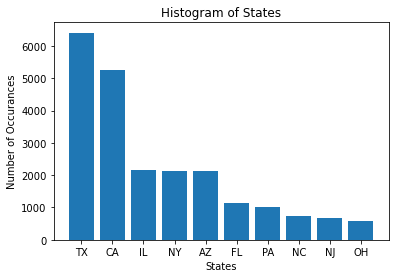

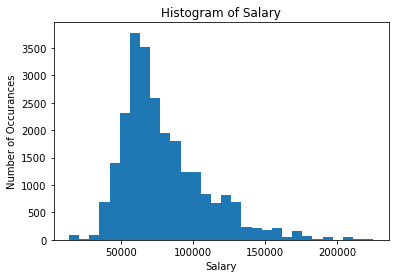

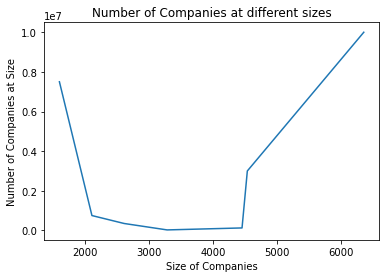

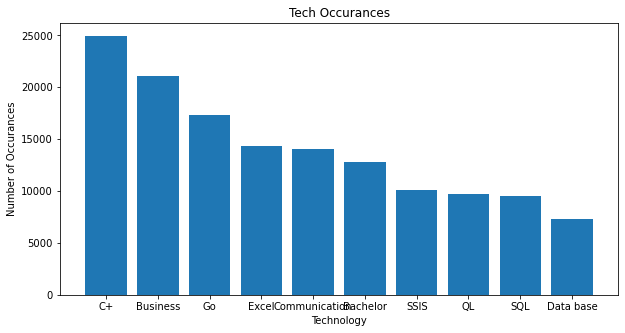

In [4]:
states_bar(jobs_df)
salary_hist(jobs_df)
size_graph(jobs_df)
tech_occurs(jobs_df)

## Final preprocessing

In [5]:
# Turn States to dummies
jobs_df = pd.get_dummies(jobs_df, columns=["State"])

## Model training

In [6]:
# Get train test splits
X_train, X_test, y_train, y_test, X, y = train_test_split_jobs(jobs_df)

# Fit and predict random forest
regr = RandomForestRegressor(max_depth=39, n_estimators=45, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

## Evaluation

In [7]:
# Root mean squared error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", round(rmse, 2))
# Explained variance
expl_var = explained_variance_score(y_test, y_pred)
print("Explained Variance:", round(expl_var, 3))

Root Mean Squared Error: 22440.02
Explained Variance: 0.382


## Get candidate's expected salary

In [8]:
pred_sal = qualifications_to_salary(X, regr)
print("Candidate's predicted salary:", pred_sal)

Candidate's predicted salary: 74952.55


## Effect of size on salary

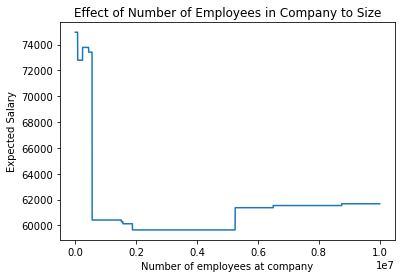

In [9]:
size_effect(X, regr)

## Effects of State on salary

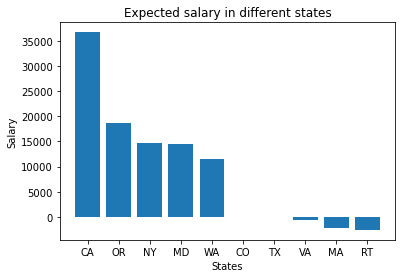

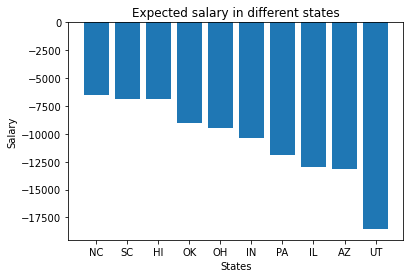

In [10]:
state_effects(X, regr, pred_sal)
state_effects(X, regr, pred_sal, top=False)

## Effects of qualifications on salary

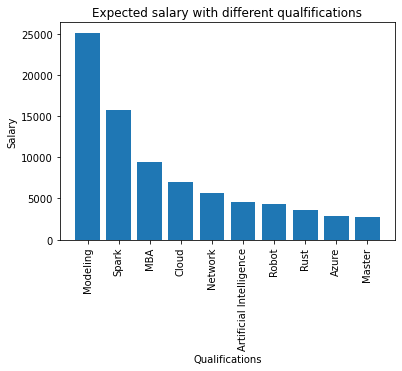

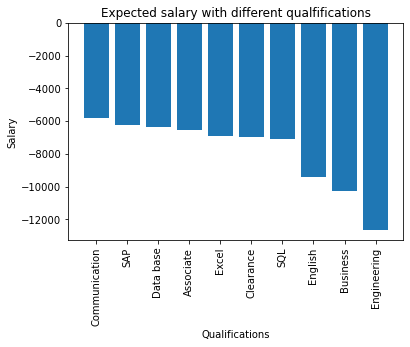

In [11]:
qualifications_effects(X, regr, pred_sal)
qualifications_effects(X, regr, pred_sal, top=False)